In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
 num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences),dimension))
    for i in range(len(sequences)):
        for j in sequences[i]:
            result[i][j] = 1
    return result

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [5]:
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])

In [6]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

In [7]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [8]:
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 16ms/step - loss: 2.5776 - accuracy: 0.5783 - val_loss: 1.8284 - val_accuracy: 0.6840
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 1.4573 - accuracy: 0.7349 - val_loss: 1.3402 - val_accuracy: 0.7250
Epoch 3/20
16/16 [==============================] - 0s 7ms/step - loss: 1.0547 - accuracy: 0.7910 - val_loss: 1.1258 - val_accuracy: 0.7700
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 0.8182 - accuracy: 0.8360 - val_loss: 1.0034 - val_accuracy: 0.7990
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6551 - accuracy: 0.8732 - val_loss: 0.9226 - val_accuracy: 0.8130
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5342 - accuracy: 0.8949 - val_loss: 0.8812 - val_accuracy: 0.8230
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.4403 - accuracy: 0.9153 - val_loss: 0.8546 - val_accuracy: 0.8180
Epoch 8/20
16/16 [=

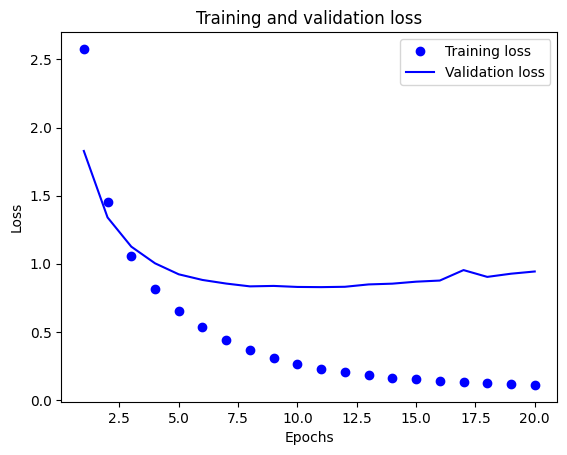

In [9]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

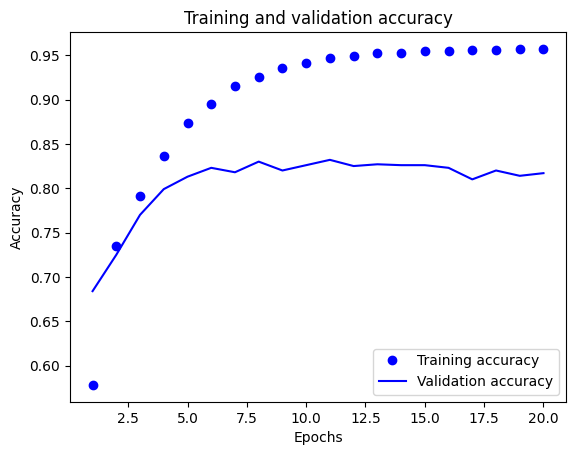

In [10]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 1ms/step - loss: 1.0620 - accuracy: 0.7956
